# Mean Shift clustering - iris case study


In [1]:
# importeer de nodige bibliotheken
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

 
from sklearn.cluster import MeanShift, estimate_bandwidth 
from sklearn.preprocessing import StandardScaler


In [2]:
# De iris gegevens laden
iris_df = pd.read_csv('data/Iris.csv', 
                      skiprows=1, 
                      names = ['sepal-length',
                               'sepal-width',
                               'petal-length',
                               'petal-width',
                               'class'])

#De eerste rijen van de dataset tonen
iris_df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# verwijder de "class" kolom
iris_df = iris_df.drop('class', axis=1)

iris_df.head()

,sepal-length,sepal-width,petal-length,petal-width
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


we need to extract the sepal and petal data as follow

In [4]:
# De sepal gegevens verkrijgen
sepal_data=iris_df[["sepal-length", "sepal-width"]]

# De petal gegevens verkrijgen
petal_data=iris_df[["petal-length", "petal-width"]]

petal_data

,petal-length,petal-width
1,1.4,0.2
2,1.4,0.2
3,1.3,0.2
4,1.5,0.2
5,1.4,0.2
...,...,...
146,5.2,2.3
147,5.0,1.9
148,5.2,2.0
149,5.4,2.3


# Mean Shift

De MeanShift-clustering kan worden bereikt met de MeanShift klass op sklearn.cluster.
We creëren twee objecten en passen ze aan de sepal and petal gegevens.


In [5]:
# Schatten "bandwidth" 
# schrijf de code om automatisch de bandwidth te detecteren
bandwidth1 = estimate_bandwidth(sepal_data, quantile=0.2, n_samples=len(sepal_data))
bandwidth2 = estimate_bandwidth(petal_data, quantile=0.2, n_samples=len(petal_data))

# Creëer de mean-shift model voor de sepal gegevens
meanshift_estimator_sepal = MeanShift(bandwidth=bandwidth1, bin_seeding=True)

# Creëer de mean-shift model voor de petal gegevens
meanshift_estimator_petal = MeanShift(bandwidth=bandwidth2, bin_seeding=True)

In [6]:
# Het models trainen
meanshift_estimator_sepal.fit(sepal_data)
meanshift_estimator_petal.fit(petal_data)

MeanShift(bandwidth=0.5120440394685901, bin_seeding=True)

In [7]:
# De labels tonen
labels_sepal = meanshift_estimator_sepal.labels_
labels_petal = meanshift_estimator_petal.labels_


In [8]:
# Haal de centroïden van de clusters uit het model en print het aantal clusters uit
centroids_sepal = meanshift_estimator_sepal.cluster_centers_
num_clusters1 = len(np.unique(labels_sepal))

centroids_petal = meanshift_estimator_petal.cluster_centers_
num_clusters2 = len(np.unique(labels_petal))

print("Het aantal clusters op sepal data =", num_clusters1)
print("Het aantal clusters op petal data =", num_clusters2)


Het aantal clusters op sepal data = 3
Het aantal clusters op petal data = 4


Laten we doorgaan en wat visualisaties doen.

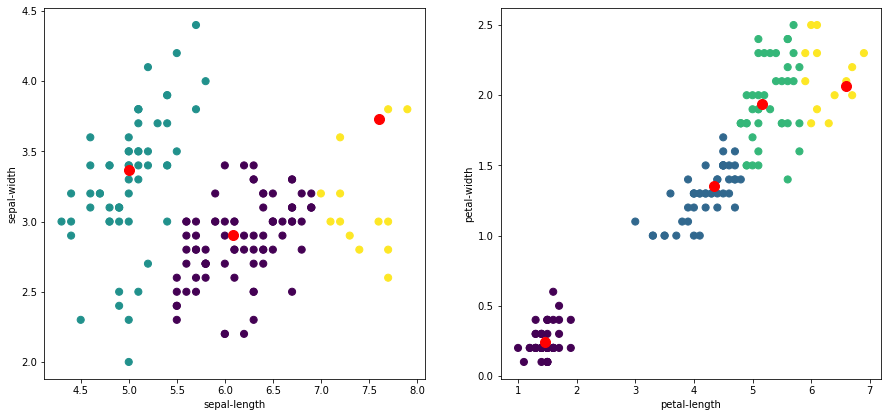

In [9]:
fig=plt.figure(figsize=(15,15))
ax1=fig.add_subplot(221)
ax2=fig.add_subplot(222)
ax1.scatter(sepal_data.values[:,0],sepal_data.values[:,1],c=labels_sepal,s=50)
ax1.scatter(centroids_sepal[:,0],centroids_sepal[:,1],c="red",s=100)

ax2.scatter(petal_data.values[:,0], petal_data.values[:,1], c=labels_petal,s=50)
ax2.scatter(centroids_petal[:,0],centroids_petal[:,1],c="red",s=100)

ax1.set(xlabel=iris_df.columns[0],ylabel=iris_df.columns[1])
ax2.set(xlabel=iris_df.columns[2],ylabel=iris_df.columns[3])

plt.show()